### CHAPTER 11
# Time Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'2.3.3'

## 11.1 Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2026, 1, 6, 15, 24, 20, 689157)

In [4]:
now.year, now.month, now.day, now.hour, now.minute, now.second

(2026, 1, 6, 15, 24, 20)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [12]:
value = '2011-01-03'
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [14]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [15]:
idx[2]

NaT

In [16]:
pd.isna(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [17]:
data = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [18]:
ts = pd.Series(np.random.standard_normal(6), index=data)
ts

2011-01-02   -0.426738
2011-01-05    1.408631
2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
2011-01-12    0.451847
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts + ts[::2]

2011-01-02   -0.853475
2011-01-05         NaN
2011-01-07    0.402560
2011-01-08         NaN
2011-01-10    0.478677
2011-01-12         NaN
dtype: float64

In [21]:
ts.index.dtype

dtype('<M8[ns]')

In [22]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [23]:
stamp = ts.index[2]
ts[stamp]

np.float64(0.20127992652068472)

In [24]:
ts["2011-01-10"]

np.float64(0.23933849802284432)

In [25]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts

2000-01-01   -1.885392
2000-01-02   -0.436180
2000-01-03    0.032170
2000-01-04    0.937679
2000-01-05    1.299007
                ...   
2002-09-22   -0.455982
2002-09-23    0.435641
2002-09-24   -1.018821
2002-09-25   -1.852213
2002-09-26   -1.740991
Freq: D, Length: 1000, dtype: float64

In [26]:
longer_ts["2001"]

2001-01-01    1.629738
2001-01-02   -0.029336
2001-01-03   -0.815383
2001-01-04   -0.584831
2001-01-05    0.024214
                ...   
2001-12-27   -0.604032
2001-12-28   -0.334153
2001-12-29   -0.986202
2001-12-30   -0.960874
2001-12-31   -0.370372
Freq: D, Length: 365, dtype: float64

In [27]:
longer_ts["2001-05"]

2001-05-01    0.074275
2001-05-02   -2.109478
2001-05-03   -1.168940
2001-05-04    1.505063
2001-05-05   -0.809382
2001-05-06    0.460420
2001-05-07   -0.114286
2001-05-08   -0.421091
2001-05-09   -2.354554
2001-05-10    0.653281
2001-05-11   -1.024286
2001-05-12    0.023679
2001-05-13    0.987743
2001-05-14    0.270073
2001-05-15   -2.079292
2001-05-16    2.057938
2001-05-17    0.094510
2001-05-18    2.008511
2001-05-19    0.100977
2001-05-20    0.702055
2001-05-21   -0.287707
2001-05-22    2.091889
2001-05-23    0.869682
2001-05-24   -0.368120
2001-05-25   -0.360872
2001-05-26   -2.007523
2001-05-27   -0.127820
2001-05-28    0.862869
2001-05-29   -1.657479
2001-05-30   -2.128653
2001-05-31   -0.155731
Freq: D, dtype: float64

In [28]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
dtype: float64

In [29]:
ts

2011-01-02   -0.426738
2011-01-05    1.408631
2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
2011-01-12    0.451847
dtype: float64

In [30]:
ts["2011-01-06":"2011-01-11"]

2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
dtype: float64

In [31]:
ts.truncate(after="2011-01-09")

2011-01-02   -0.426738
2011-01-05    1.408631
2011-01-07    0.201280
2011-01-08   -0.724552
dtype: float64

In [32]:
ts

2011-01-02   -0.426738
2011-01-05    1.408631
2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
2011-01-12    0.451847
dtype: float64

In [33]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas", "New York", "Ohio"])
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,1.090358,0.290030,-0.957813,-1.212164
2001-05-09,0.051084,0.847283,-0.039246,1.268846
2001-05-16,-0.580864,0.176880,-0.357599,-0.777636
2001-05-23,-0.237184,0.655282,-1.474321,-0.578018
2001-05-30,-0.972696,-1.532826,0.459923,-0.563170


### Time Series with Duplicate Indices

In [34]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [35]:
dup_ts.index.is_unique

False

In [36]:
dup_ts["2000-01-03"]

np.int64(4)

In [37]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [38]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [39]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [40]:
ts

2011-01-02   -0.426738
2011-01-05    1.408631
2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-10    0.239338
2011-01-12    0.451847
dtype: float64

In [41]:
resampler = ts.resample("D")  # The string "D" is interpreted as daily frequency.
resampler

In [42]:
resampler.mean()

2011-01-02   -0.426738
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    1.408631
2011-01-06         NaN
2011-01-07    0.201280
2011-01-08   -0.724552
2011-01-09         NaN
2011-01-10    0.239338
2011-01-11         NaN
2011-01-12    0.451847
Freq: D, dtype: float64

### Generating Date Ranges

In [43]:
index = pd.date_range("2012-04-01", "2012-06-01")
index


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [44]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")  # Business month end frequency

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\2781953853.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")  # Business month end frequency


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [47]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [49]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [50]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [51]:
pd.date_range("2000- 01-01", "2000-01-03 23:59", freq="4H")

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\3173807497.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000- 01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [52]:
Hour(2) + Minute(30)

<150 * Minutes>

In [53]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

#### Week of month dates

In [54]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

### Shifting (Leading and Lagging) Data

In [55]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="ME"))
ts

2000-01-31    0.644723
2000-02-29    1.192487
2000-03-31   -1.053374
2000-04-30    0.155676
Freq: ME, dtype: float64

In [56]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.644723
2000-04-30    1.192487
Freq: ME, dtype: float64

In [57]:
ts.shift(-2)

2000-01-31   -1.053374
2000-02-29    0.155676
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [58]:
ts

2000-01-31    0.644723
2000-02-29    1.192487
2000-03-31   -1.053374
2000-04-30    0.155676
Freq: ME, dtype: float64

In [59]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    0.849612
2000-03-31   -1.883343
2000-04-30   -1.147788
Freq: ME, dtype: float64

In [60]:
ts.shift(2, freq="ME")

2000-03-31    0.644723
2000-04-30    1.192487
2000-05-31   -1.053374
2000-06-30    0.155676
Freq: ME, dtype: float64

In [61]:
ts.shift(3, freq="D")

2000-02-03    0.644723
2000-03-03    1.192487
2000-04-03   -1.053374
2000-05-03    0.155676
dtype: float64

In [62]:
ts.shift(1, freq="90min")

2000-01-31 01:30:00    0.644723
2000-02-29 01:30:00    1.192487
2000-03-31 01:30:00   -1.053374
2000-04-30 01:30:00    0.155676
dtype: float64

### Shifting dates with offsets

In [63]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [64]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [65]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [66]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [67]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15    1.830917
2000-01-19    0.415099
2000-01-23    0.947941
2000-01-27   -0.245777
2000-01-31   -0.233020
2000-02-04    2.055415
2000-02-08   -1.191453
2000-02-12   -1.206261
2000-02-16   -1.484732
2000-02-20    1.575959
2000-02-24    0.982614
2000-02-28    1.485885
2000-03-03   -1.710516
2000-03-07    0.689036
2000-03-11    2.125713
2000-03-15   -0.476148
2000-03-19   -0.147152
2000-03-23   -0.702516
2000-03-27   -0.527843
2000-03-31    0.437950
Freq: 4D, dtype: float64

In [68]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.543032
2000-02-29    0.316775
2000-03-31   -0.038935
dtype: float64

## 11.4 Time Zone Handling

In [69]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [70]:
tz = pytz.timezone("Asia/Dhaka")
tz

<DstTzInfo 'Asia/Dhaka' LMT+6:02:00 STD>

### Time Zone Localization and Conversion

In [71]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    1.397827
2012-03-10 09:30:00    2.759035
2012-03-11 09:30:00   -0.327166
2012-03-12 09:30:00   -0.130963
2012-03-13 09:30:00    0.295163
2012-03-14 09:30:00    0.726973
Freq: D, dtype: float64

In [72]:
print(ts.index.tz)

None


In [73]:
pd.date_range("2012-03-09 09:30", periods=10, tz="Asia/Dhaka")

DatetimeIndex(['2012-03-09 09:30:00+06:00', '2012-03-10 09:30:00+06:00',
               '2012-03-11 09:30:00+06:00', '2012-03-12 09:30:00+06:00',
               '2012-03-13 09:30:00+06:00', '2012-03-14 09:30:00+06:00',
               '2012-03-15 09:30:00+06:00', '2012-03-16 09:30:00+06:00',
               '2012-03-17 09:30:00+06:00', '2012-03-18 09:30:00+06:00'],
              dtype='datetime64[ns, Asia/Dhaka]', freq='D')

In [74]:
ts

2012-03-09 09:30:00    1.397827
2012-03-10 09:30:00    2.759035
2012-03-11 09:30:00   -0.327166
2012-03-12 09:30:00   -0.130963
2012-03-13 09:30:00    0.295163
2012-03-14 09:30:00    0.726973
Freq: D, dtype: float64

In [75]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    1.397827
2012-03-10 09:30:00+00:00    2.759035
2012-03-11 09:30:00+00:00   -0.327166
2012-03-12 09:30:00+00:00   -0.130963
2012-03-13 09:30:00+00:00    0.295163
2012-03-14 09:30:00+00:00    0.726973
Freq: D, dtype: float64

In [76]:
ts_dhaka = ts.tz_localize("Asia/Dhaka")
ts_dhaka

2012-03-09 09:30:00+06:00    1.397827
2012-03-10 09:30:00+06:00    2.759035
2012-03-11 09:30:00+06:00   -0.327166
2012-03-12 09:30:00+06:00   -0.130963
2012-03-13 09:30:00+06:00    0.295163
2012-03-14 09:30:00+06:00    0.726973
dtype: float64

In [77]:
ts_dhaka.index

DatetimeIndex(['2012-03-09 09:30:00+06:00', '2012-03-10 09:30:00+06:00',
               '2012-03-11 09:30:00+06:00', '2012-03-12 09:30:00+06:00',
               '2012-03-13 09:30:00+06:00', '2012-03-14 09:30:00+06:00'],
              dtype='datetime64[ns, Asia/Dhaka]', freq=None)

In [78]:
ts_kolkata = ts_dhaka.tz_convert("Asia/Kolkata")
ts_kolkata

2012-03-09 09:00:00+05:30    1.397827
2012-03-10 09:00:00+05:30    2.759035
2012-03-11 09:00:00+05:30   -0.327166
2012-03-12 09:00:00+05:30   -0.130963
2012-03-13 09:00:00+05:30    0.295163
2012-03-14 09:00:00+05:30    0.726973
dtype: float64

### Operations with Time Zone-Aware Timestamp Objects

In [79]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("UTC")
stamp_utc.tz_convert("Asia/Dhaka")

Timestamp('2011-03-12 10:00:00+0600', tz='Asia/Dhaka')

In [80]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [81]:
stamp_utc.value

1299902400000000000

In [82]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

### Operations Between Different Time Zones

In [83]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.422095
2012-03-08 09:30:00   -1.660360
2012-03-09 09:30:00    0.456490
2012-03-12 09:30:00    0.588002
2012-03-13 09:30:00   -0.234656
2012-03-14 09:30:00   -0.942944
2012-03-15 09:30:00    1.293909
2012-03-16 09:30:00   -0.838236
2012-03-19 09:30:00    0.114519
2012-03-20 09:30:00    0.473460
Freq: B, dtype: float64

In [84]:
ts1 = ts[:7].tz_localize("Asia/Dhaka")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 03:30:00+00:00', '2012-03-08 03:30:00+00:00',
               '2012-03-09 03:30:00+00:00', '2012-03-12 03:30:00+00:00',
               '2012-03-13 03:30:00+00:00', '2012-03-14 03:30:00+00:00',
               '2012-03-15 03:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

In [85]:
p = pd.Period("2011", "Y-DEC")
p

Period('2011', 'Y-DEC')

In [86]:
p + 5

Period('2016', 'Y-DEC')

In [87]:
p - 2

Period('2009', 'Y-DEC')

In [88]:
pd.Period("2014", freq="Y-DEC") - p

<3 * YearEnds: month=12>

In [89]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [90]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -0.596486
2000-02   -1.337860
2000-03    0.638165
2000-04    1.720787
2000-05    0.361019
2000-06    0.420279
Freq: M, dtype: float64

In [91]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [92]:
p = pd.Period("2011", freq="Y-DEC")
p

Period('2011', 'Y-DEC')

In [93]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [94]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [95]:
# p.asfreq("B", how="start")

In [96]:
p = pd.Period("2011", "Y-JUN")
p

Period('2011', 'Y-JUN')

In [97]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [98]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [99]:
p = pd.Period("Aug-2011", "M")
p.asfreq("Y-JUN")

Period('2012', 'Y-JUN')

In [100]:
periods = pd.period_range("2006", "2009", freq="Y-DEC")
periods

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[Y-DEC]')

In [101]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006   -1.152924
2007    0.101800
2008   -0.214849
2009   -0.394398
Freq: Y-DEC, dtype: float64

In [102]:
ts.asfreq("M", how="start")

2006-01   -1.152924
2007-01    0.101800
2008-01   -0.214849
2009-01   -0.394398
Freq: M, dtype: float64

In [103]:
ts.asfreq(freq="B", how="end")

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\1114802133.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq(freq="B", how="end")


2006-12-29   -1.152924
2007-12-31    0.101800
2008-12-31   -0.214849
2009-12-31   -0.394398
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [104]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [105]:
p.asfreq("D", "start")

Period('2011-11-01', 'D')

In [106]:
p.asfreq("M", how="end")

Period('2012-01', 'M')

In [107]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("min", how="start") + 16 * 600
p4pm

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\3309298150.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("min", how="start") + 16 * 600


Period('2012-02-05 16:00', 'min')

In [108]:
p4pm.to_timestamp()

Timestamp('2012-02-05 16:00:00')

In [109]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [110]:
new_periods = (periods.asfreq("B", how="end") - 1).asfreq("h", how="start") + 16 
ts.index = new_periods.to_timestamp()
ts

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\1672470225.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", how="end") - 1).asfreq("h", how="start") + 16


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [111]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts =pd.Series(np.random.standard_normal(3), index=dates)
ts

C:\Users\sahor\AppData\Local\Temp\ipykernel_8448\2920275210.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


2000-01-31   -0.607749
2000-02-29   -0.573170
2000-03-31    0.954867
Freq: ME, dtype: float64

In [112]:
pts = ts.to_period()
pts

2000-01   -0.607749
2000-02   -0.573170
2000-03    0.954867
Freq: M, dtype: float64

In [113]:
dates =pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29    0.746623
2000-01-30    0.511907
2000-01-31    0.246541
2000-02-01    0.719101
2000-02-02   -1.239187
2000-02-03    0.318481
Freq: D, dtype: float64

In [114]:
ts2.to_period("M")

2000-01    0.746623
2000-01    0.511907
2000-01    0.246541
2000-02    0.719101
2000-02   -1.239187
2000-02    0.318481
Freq: M, dtype: float64

In [115]:
pts = ts2.to_period()
pts

2000-01-29    0.746623
2000-01-30    0.511907
2000-01-31    0.246541
2000-02-01    0.719101
2000-02-02   -1.239187
2000-02-03    0.318481
Freq: D, dtype: float64

In [116]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    0.746623
2000-01-30 23:59:59.999999999    0.511907
2000-01-31 23:59:59.999999999    0.246541
2000-02-01 23:59:59.999999999    0.719101
2000-02-02 23:59:59.999999999   -1.239187
2000-02-03 23:59:59.999999999    0.318481
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [117]:
data = pd.read_csv("examples/macrodata.csv")
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [118]:
data["year"]

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [119]:
data["quarter"]

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [120]:
# index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC") # Future Error
index = pd.PeriodIndex.from_fields(
    year=data["year"], quarter=data["quarter"], freq="Q-DEC"
)
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [121]:
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [122]:
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [123]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    2.222839
2000-01-02    0.446077
2000-01-03   -0.601597
2000-01-04   -0.111540
2000-01-05   -2.127510
                ...   
2000-04-05   -0.274170
2000-04-06    1.587247
2000-04-07   -0.215939
2000-04-08   -0.577365
2000-04-09    0.216462
Freq: D, Length: 100, dtype: float64

In [124]:
ts.resample("ME").mean() # Monthly end frequency

2000-01-31   -0.072509
2000-02-29    0.063821
2000-03-31   -0.012490
2000-04-30   -0.006218
Freq: ME, dtype: float64

In [125]:
# ts.resample("ME", kind="periods").mean()
ts.resample("ME").mean().to_period("M")

2000-01   -0.072509
2000-02    0.063821
2000-03   -0.012490
2000-04   -0.006218
Freq: M, dtype: float64

### Downsampling

In [126]:
dates = pd.date_range("2000-01-01", periods=12, freq="min")

In [127]:
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [128]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [129]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [130]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [131]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

### Open-high-low-close (OHLC) resampling

In [132]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts

2000-01-01 00:00:00     5
2000-01-01 00:01:00     2
2000-01-01 00:02:00     3
2000-01-01 00:03:00     4
2000-01-01 00:04:00     9
2000-01-01 00:05:00     0
2000-01-01 00:06:00     7
2000-01-01 00:07:00     1
2000-01-01 00:08:00     6
2000-01-01 00:09:00    10
2000-01-01 00:10:00    11
2000-01-01 00:11:00     8
Freq: min, dtype: int64

In [133]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,5,9,2,9
2000-01-01 00:05:00,0,10,0,10
2000-01-01 00:10:00,11,11,8,8


### Upsampling and Interpolation

In [134]:
frame = pd.DataFrame(
    np.random.standard_normal((2, 4)),
    index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.090242,0.383666,-0.469628,0.356017
2000-01-12,1.444781,-0.439098,0.587219,1.089072


In [135]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.090242,0.383666,-0.469628,0.356017
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.444781,-0.439098,0.587219,1.089072


In [136]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.090242,0.383666,-0.469628,0.356017
2000-01-06,-1.090242,0.383666,-0.469628,0.356017
2000-01-07,-1.090242,0.383666,-0.469628,0.356017
2000-01-08,-1.090242,0.383666,-0.469628,0.356017
2000-01-09,-1.090242,0.383666,-0.469628,0.356017
2000-01-10,-1.090242,0.383666,-0.469628,0.356017
2000-01-11,-1.090242,0.383666,-0.469628,0.356017
2000-01-12,1.444781,-0.439098,0.587219,1.089072


In [137]:
frame.resample("D").bfill()


,Colorado,Texas,New York,Ohio
2000-01-05,-1.090242,0.383666,-0.469628,0.356017
2000-01-06,1.444781,-0.439098,0.587219,1.089072
2000-01-07,1.444781,-0.439098,0.587219,1.089072
2000-01-08,1.444781,-0.439098,0.587219,1.089072
2000-01-09,1.444781,-0.439098,0.587219,1.089072
2000-01-10,1.444781,-0.439098,0.587219,1.089072
2000-01-11,1.444781,-0.439098,0.587219,1.089072
2000-01-12,1.444781,-0.439098,0.587219,1.089072


In [138]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.090242,0.383666,-0.469628,0.356017
2000-01-06,-1.090242,0.383666,-0.469628,0.356017
2000-01-07,-1.090242,0.383666,-0.469628,0.356017
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.444781,-0.439098,0.587219,1.089072


In [139]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.090242,0.383666,-0.469628,0.356017
2000-01-13,1.444781,-0.439098,0.587219,1.089072


### Resampling with Periods

In [140]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001", freq="M"),
                        columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,2.248404,1.300280,-1.233962,0.346793
2000-02,-0.097007,1.897954,-0.363281,0.913107
2000-03,0.178924,-1.486472,0.869769,-0.030285
2000-04,0.683154,0.695013,-0.317179,-2.068708
2000-05,-0.737800,-0.862420,-1.883855,1.758481


In [141]:
anual_frame = frame.resample("Y-DEC").mean()
anual_frame

,Colorado,Texas,New York,Ohio
2000,-0.058151,0.087153,-0.518898,0.142416
2001,0.120245,-0.324281,0.218846,-0.206812


In [142]:
anual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.058151,0.087153,-0.518898,0.142416
2000Q2,-0.058151,0.087153,-0.518898,0.142416
2000Q3,-0.058151,0.087153,-0.518898,0.142416
2000Q4,-0.058151,0.087153,-0.518898,0.142416
2001Q1,0.120245,-0.324281,0.218846,-0.206812
2001Q2,0.120245,-0.324281,0.218846,-0.206812
2001Q3,0.120245,-0.324281,0.218846,-0.206812
2001Q4,0.120245,-0.324281,0.218846,-0.206812


In [143]:
anual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.058151,0.087153,-0.518898,0.142416
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.120245,-0.324281,0.218846,-0.206812


In [144]:
anual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.058151,0.087153,-0.518898,0.142416
2001Q1,-0.058151,0.087153,-0.518898,0.142416
2001Q2,-0.058151,0.087153,-0.518898,0.142416
2001Q3,-0.058151,0.087153,-0.518898,0.142416
2001Q4,0.120245,-0.324281,0.218846,-0.206812
2002Q1,0.120245,-0.324281,0.218846,-0.206812
2002Q2,0.120245,-0.324281,0.218846,-0.206812
2002Q3,0.120245,-0.324281,0.218846,-0.206812


### Grouped Time Resampling

In [145]:
n = 15
times = pd.date_range("2017-05-20", periods=n, freq="1min")
df = pd.DataFrame({"time": times, "value": np.arange(n)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [146]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [147]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["A", "B", "C"], n),
                    "value": np.arange(n * 3)})
df2.head()

,time,key,value
0,2017-05-20 00:00:00,A,0
1,2017-05-20 00:00:00,B,1
2,2017-05-20 00:00:00,C,2
3,2017-05-20 00:01:00,A,3
4,2017-05-20 00:01:00,B,4


In [148]:
time_key = pd.Grouper(freq="5min")
resampled = df2.set_index("time").groupby(["key", time_key]).sum()
resampled

value
key time                      
A   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
B   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
C   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

In [149]:
resampled.reset_index()

,key,time,value
0,A,2017-05-20 00:00:00,30
1,A,2017-05-20 00:05:00,105
2,A,2017-05-20 00:10:00,180
3,B,2017-05-20 00:00:00,35
4,B,2017-05-20 00:05:00,110
5,B,2017-05-20 00:10:00,185
6,C,2017-05-20 00:00:00,40
7,C,2017-05-20 00:05:00,115
8,C,2017-05-20 00:10:00,190


## 11.7 Moving Window Functions

In [150]:
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates=True, index_col=0)
close_px_all.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [151]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


<Axes: >

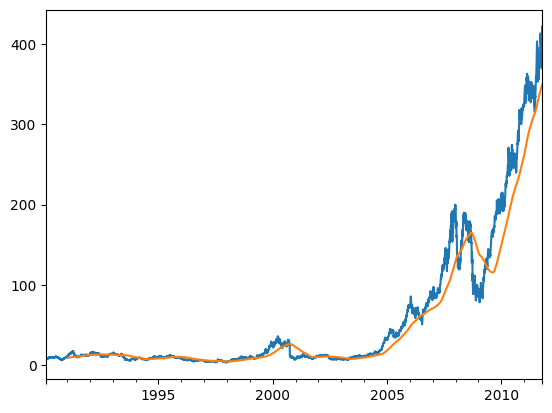

In [152]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

In [153]:
import matplotlib.pyplot as plt
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14         NaN
1990-02-15    0.022385
1990-02-16    0.021609
Freq: B, Name: AAPL, dtype: float64

<Figure size 640x480 with 0 Axes>

<Axes: >

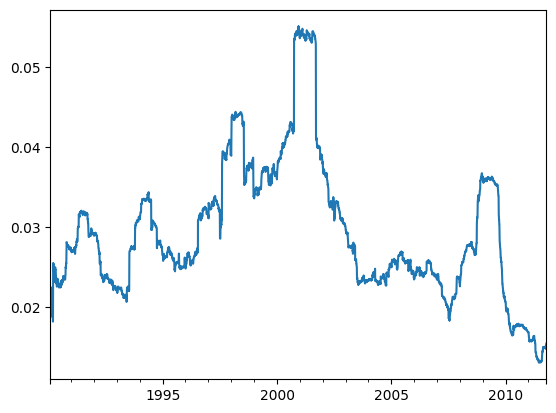

In [154]:
std250.plot()

<Axes: >

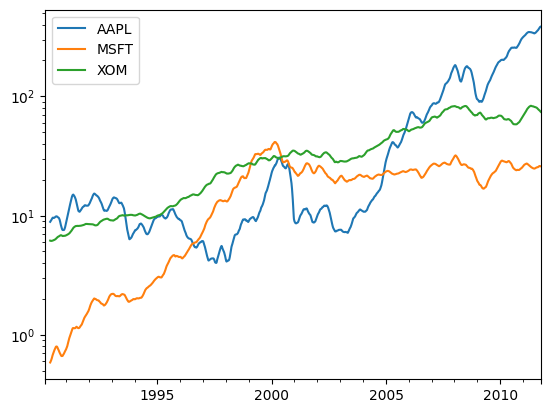

In [159]:
extending_mean =  std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [156]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

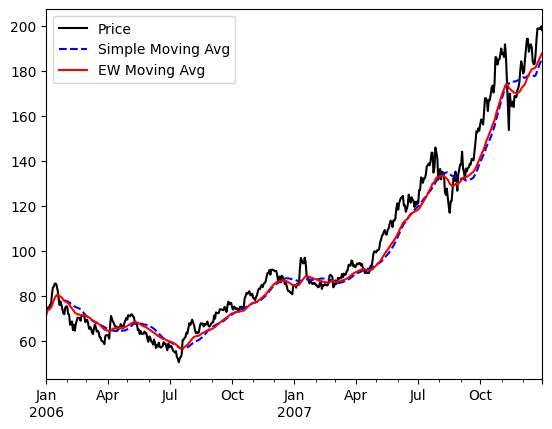

In [162]:
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean() # Exponentially Weighted Moving Average (EWMA)
aapl_px.plot(style="k-", label="Price")
ma30.plot(style="b--", label="Simple Moving Avg")
ewma30.plot(style="r-", label="EW Moving Avg")
plt.legend()

### Binary Moving Window Functions

<Axes: >

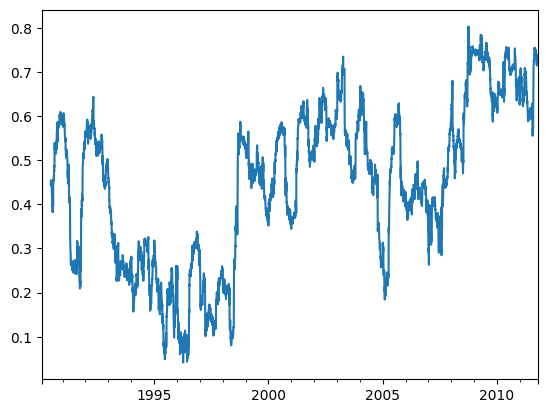

In [163]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

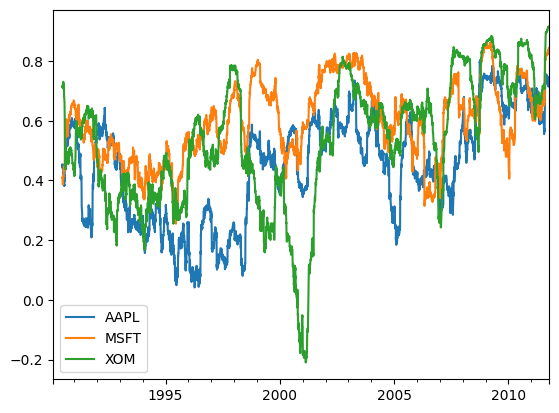

In [164]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

<Axes: >

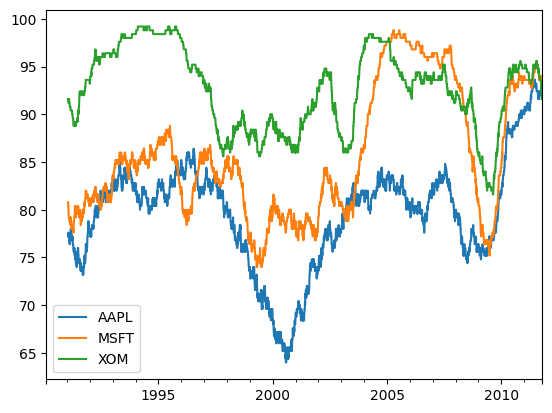

In [165]:
from scipy.stats import percentileofscore
def score_at_2perxent(x):
    return percentileofscore(x, 0.02)
result = returns.rolling(250).apply(score_at_2perxent)
result.plot()

## 11.8 Conclusion
Time series data calls for different types of analysis and data transformation tools than the other types of data we have explored in previous chapters. 
In the following chapter, we will show how to start using modeling libraries like statsmodels and scikit-learn.
